<a href="https://colab.research.google.com/github/AlexandreBourrieau/ML/blob/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/Analyse_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans ce carnet nous allons mettre en application les outils de base d'analyse et de traitement des séries temporelles :
  - Autocorrélation 
  - Autocorrélation partielle
  - Suppression d'une tendance linéaire d'une série
  - Différenciation non saisonnale et saisonnale
  - Suppression d'une tendance non linéaire d'une série
  - Supression d'une saisonnalité
  - Test de Dickey-Fuller (test de stationnarité)

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.5MB 7.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# Chargement des séries

In [3]:
# Fonction permettant d'afficher une série temporelle
def affiche_serie(temps, serie, format="-", debut=0, fin=None, label=None):
    plt.plot(temps[debut:fin], serie[debut:fin], format, label=label)
    plt.xlabel("Temps")
    plt.ylabel("Valeur")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

!rm *.csv
!rm *.csv.*
!wget -q --no-check-certificate --content-disposition "https://raw.githubusercontent.com/AlexandreBourrieau/ML/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/data/serie_hetero.csv"
!wget -q --no-check-certificate --content-disposition  "https://raw.githubusercontent.com/AlexandreBourrieau/ML/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/data/serie_homo.csv"
!wget -q --no-check-certificate --content-disposition "https://raw.githubusercontent.com/AlexandreBourrieau/ML/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/data/serie_bb.csv"
!wget -q --no-check-certificate --content-disposition "https://raw.githubusercontent.com/AlexandreBourrieau/ML/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/data/serie_rw.csv"
!wget -q --no-check-certificate --content-disposition "https://raw.githubusercontent.com/AlexandreBourrieau/ML/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/data/serie_bb_trend.csv"
!wget -q --no-check-certificate --content-disposition "https://raw.githubusercontent.com/AlexandreBourrieau/ML/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/data/GDP.csv"
!wget -q --no-check-certificate --content-disposition "https://raw.githubusercontent.com/AlexandreBourrieau/ML/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/data/Data_Airline.csv"
!wget -q --no-check-certificate --content-disposition "https://raw.githubusercontent.com/AlexandreBourrieau/ML/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/data/Data_Accidental.csv"


serie_hetero = pd.read_csv("serie_hetero.csv", usecols=[1], engine='python')
serie_homo = pd.read_csv("serie_homo.csv", usecols=[1], engine='python')
serie_bb = pd.read_csv("serie_bb.csv", usecols=[1], engine='python')
serie_rw = pd.read_csv("serie_rw.csv", usecols=[1], engine='python')
serie_bb_trend = pd.read_csv("serie_bb_trend.csv", usecols=[1], engine='python')
serie_gdp = pd.read_csv("GDP.csv", usecols=[0], engine='python')
serie_data_airline = pd.read_csv("Data_Airline.csv", usecols=[0], engine='python')
serie_data_accidental = pd.read_csv("Data_Accidental.csv", usecols=[0], engine='python')


serie_hetero = np.asarray(serie_hetero.astype('float32'))[:,0]
serie_homo = np.asarray(serie_homo.astype('float32'))[:,0]
serie_bb = np.asarray(serie_bb.astype('float32'))[:,0]
serie_rw = np.asarray(serie_rw.astype('float32'))[:,0]
serie_bb_trend = np.asarray(serie_bb_trend.astype('float32'))[:,0]
serie_gdp = np.asarray(serie_gdp.astype('float32'))[:,0]
serie_data_airline = np.asarray(serie_data_airline.astype('float32'))[:,0]
serie_data_accidental = np.asarray(serie_data_accidental.astype('float32'))[:,0]

rm: cannot remove '*.csv': No such file or directory
rm: cannot remove '*.csv.*': No such file or directory


In [4]:
serie_gdp = pd.read_csv("GDP.csv", usecols=[0], engine='python')

In [5]:
serie_gdp = np.asarray(serie_gdp.astype('float32'))[:,0]

In [6]:
serie_gdp

array([ 1568.7,  1568. ,  1590.9,  1616.1,  1644.6,  1654.1,  1658. ,
        1633.2,  1628.4,  1646.7,  1629.9,  1696.8,  1747.3,  1815.8,
        1848.9,  1871.3,  1903.1,  1941.1,  1944.4,  1964.7,  1966. ,
        1978.8,  2043.8,  2082.3,  2098.1,  2085.4,  2052.5,  2042.4,
        2044.3,  2066.9,  2107.8,  2168.5,  2204. ,  2233.4,  2245.3,
        2234.8,  2252.5,  2249.8,  2286.5,  2300.3,  2294.6,  2317. ,
        2292.5,  2230.2,  2243.4,  2295.2,  2348. ,  2392.9,  2455.8,
        2453.9,  2462.6,  2517.4,  2504.8,  2508.7,  2476.2,  2491.2,
        2538. ,  2579.1,  2631.8,  2679.1,  2708.4,  2733.3,  2740. ,
        2775.9,  2810.6,  2863.5,  2885.8,  2950.5,  2984.8,  3025.5,
        3033.6,  3108.2,  3150.2,  3214.1,  3291.8,  3372.3,  3384. ,
        3406.3,  3433.7,  3464.1,  3464.3,  3491.8,  3518.2,  3590.7,
        3651.6,  3676.5,  3692. ,  3750.2,  3760.9,  3784.2,  3766.3,
        3760. ,  3767.1,  3800.5,  3759.8,  3864.1,  3885.9,  3916.7,
        3927.9,  399

#1. Bruit blanc




In [ ]:
temps = np.linspace(0,len(serie_bb),len(serie_bb))
plt.figure(figsize=(10, 6))
affiche_serie(temps,serie_bb)
plt.title('Bruit blanc')
plt.show()

In [ ]:
# ACF & PACF du bruit blanc

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_bb, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation du bruit blanc")

plot_pacf(serie_bb, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation partielle du bruit blanc")


Test de Dickey-Fuller

In [ ]:
import statsmodels.api as sm

serie_test = serie_bb

adf, p, usedlag, nobs, cvs, aic = sm.tsa.stattools.adfuller(serie_test)

adf_results_string = 'ADF: {}\np-value: {},\nN: {}, \ncritical values: {}'
print(adf_results_string.format(adf, p, nobs, cvs))

#2. Bruit blanc avec tendance

Voyons comment supprimer la tendance sur un bruit blanc

In [ ]:
temps = np.linspace(0,len(serie_bb),len(serie_bb_trend))
plt.figure(figsize=(10, 6))
affiche_serie(temps,serie_bb_trend)
plt.title('Bruit blanc avec tendance')
plt.show()

In [ ]:
# ACF & PACF du bruit blanc avec tendance

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_bb_trend, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation du bruit blanc avec tendance")

plot_pacf(serie_bb_trend, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation partielle du bruit blanc avec tendance")

In [ ]:
# Detendring du bruit blanc avec tendance
from scipy import signal

serie_bb_detrend = signal.detrend(serie_bb_trend)

plt.figure(figsize=(10, 6))
affiche_serie(temps,serie_bb_detrend)
plt.title('Signal sans tendance')
plt.show()

In [ ]:
# ACF & PACF du signal

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_bb_detrend, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation du bruit blanc avec tendance")

plot_pacf(serie_bb_detrend, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation partielle du bruit blanc avec tendance")

In [ ]:
import statsmodels.api as sm

serie_test = serie_bb_trend
#serie_test = serie_bb_detrend

adf, p, usedlag, nobs, cvs, aic = sm.tsa.stattools.adfuller(serie_test)

adf_results_string = 'ADF: {}\np-value: {},\nN: {}, \ncritical values: {}'
print(adf_results_string.format(adf, p, nobs, cvs))

#3. Random Walk

Voyons comment supprimer la tendance et différencier un signal à l'odre 1

In [ ]:
temps = np.linspace(0,len(serie_bb),len(serie_rw))

plt.figure(figsize=(10, 6))
affiche_serie(temps,serie_rw)
plt.title('Random Walk')
plt.show()

In [ ]:
# ACF & PACF du random walk

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_rw, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation du random walk")

plot_pacf(serie_rw, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation partielle du random walk")

In [ ]:
# Detendring du random walk
from scipy import signal

serie_rw_detrend = signal.detrend(serie_rw)

plt.figure(figsize=(10, 6))
affiche_serie(temps,serie_rw_detrend)
plt.title('Signal sans tendance')
plt.show()

In [ ]:
# ACF & PACF du signal

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_rw_detrend, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation du signal sans tendance")

plot_pacf(serie_rw_detrend, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation du signal sans tendance")

In [ ]:
# Différenciation d'ordre 1

serie_rw_detrend_dif1 = serie_rw_detrend[1:] - serie_rw_detrend[:-1]
serie_rw_dif1 = serie_rw[1:] - serie_rw[:-1]


In [ ]:
f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

ax1.plot(temps[1:],serie_rw_detrend_dif1)
ax1.set_title("Signal sans tendance différencié #1")

ax2.plot(temps[1:],serie_rw_dif1)
ax2.set_title("Signal différencié #1")

In [ ]:
# ACF & PACF du signal

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_rw_detrend_dif1, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation du signal sans tendance différencié #1")

plot_pacf(serie_rw_detrend_dif1, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation partielle du signal sans tendance différencié #1")

plot_acf(serie_rw_dif1, ax=ax3, lags = range(0,50))
ax3.set_title("Autocorrélation du signal différencié #1")

plot_pacf(serie_rw_dif1, ax=ax4, lags = range(0, 50))
ax4.set_title("Autocorrélation partielle du signal différencié #1")

In [ ]:
import statsmodels.api as sm

serie_test = serie_rw
#serie_test = serie_rw_detrend
#serie_test = serie_rw_detrend_dif1


adf, p, usedlag, nobs, cvs, aic = sm.tsa.stattools.adfuller(serie_test)

adf_results_string = 'ADF: {}\np-value: {},\nN: {}, \ncritical values: {}'
print(adf_results_string.format(adf, p, nobs, cvs))

#4. Série Homoscédatique

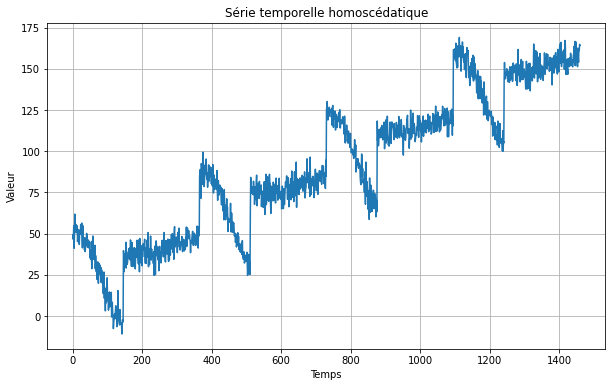

In [7]:
temps = np.linspace(0,len(serie_bb),len(serie_homo))

plt.figure(figsize=(10, 6))
affiche_serie(temps,serie_homo)
plt.title('Série temporelle homoscédatique')
plt.show()

Text(0.5, 1.0, 'Autocorrélation partielle de la série Homoscédatique')

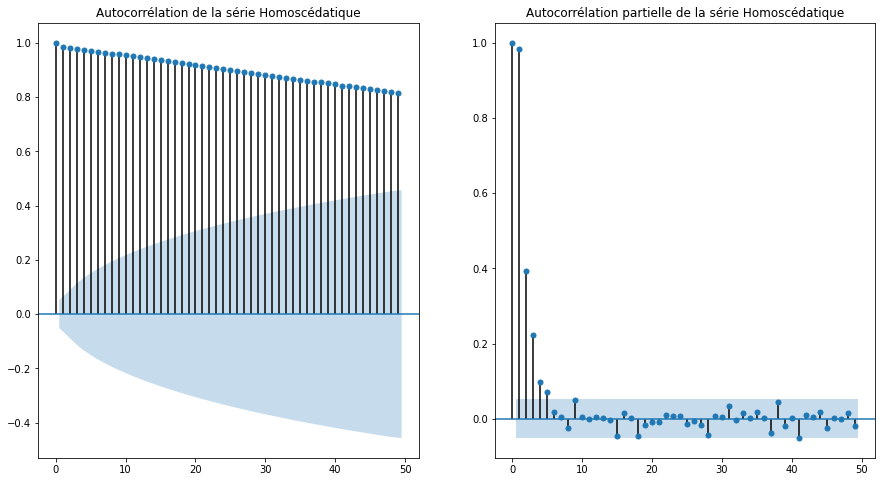

In [8]:
# ACF & PACF de la série Homoscédatique

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_homo, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation de la série Homoscédatique")

plot_pacf(serie_homo, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation partielle de la série Homoscédatique")

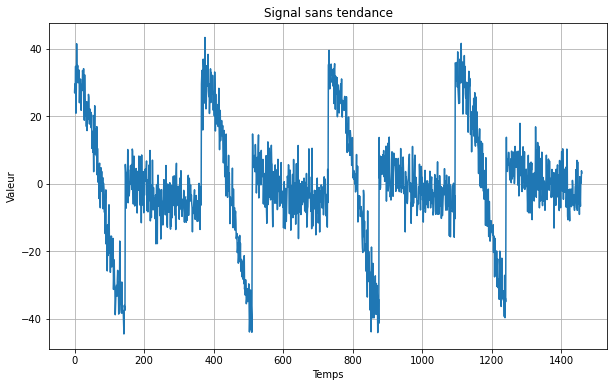

In [14]:
# Detendring de la série homoscédatique
from scipy import signal

serie_homo_detrend = signal.detrend(serie_homo)

plt.figure(figsize=(10, 6))
affiche_serie(temps,serie_homo_detrend)
plt.title('Signal sans tendance')
plt.show()

Text(0.5, 1.0, 'Autocorrélation du signal')

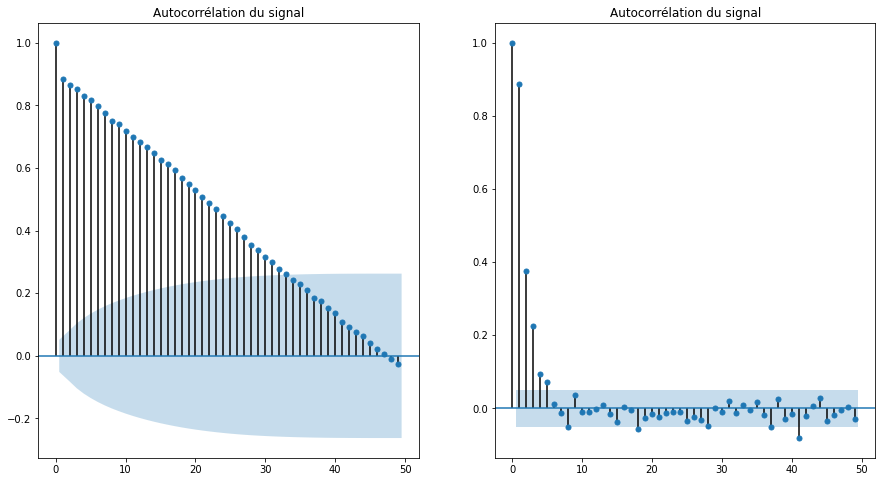

In [15]:
# ACF & PACF du signal

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_homo_detrend, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation du signal")

plot_pacf(serie_homo_detrend, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation du signal")

In [ ]:
# Différenciation d'ordre 1

from statsmodels.tsa.statespace.tools import diff

serie_homo_detrend_dif1 = diff(serie_homo_detrend,1)

plt.figure(figsize=(10, 6))
affiche_serie(temps[1:],serie_homo_detrend_dif1)
plt.title("Signal différencié d'ordre 1")
plt.show()

In [ ]:
# ACF & PACF du signal

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_homo_detrend_dif1, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation du signal après diff #1")

plot_pacf(serie_homo_detrend_dif1, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation du signal après diff #1")

In [ ]:
# Différenciation d'odre 1 et saisonnale à l'odre 1 et de période 365

from statsmodels.tsa.statespace.tools import diff

serie_homo_detrend_sdif1 = diff(serie_homo,1,1,365)       # diff=1 ; diff_saison=1 ; periode = 365

lag = len(temps) - len(serie_homo_detrend_sdif1)

plt.figure(figsize=(10, 6))
affiche_serie(temps[lag:],serie_homo_detrend_sdif1)
plt.title("Signal différencié d'ordre 1 + saisonalité")
plt.show()

In [ ]:
# ACF & PACF du signal

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_homo_detrend_sdif1, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation du signal")

plot_pacf(serie_homo_detrend_sdif1, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation partielle du signal")

In [ ]:
import statsmodels.api as sm

serie_test = serie_homo
serie_test = serie_homo_detrend
serie_test = serie_homo_detrend_dif1
serie_test = serie_homo_detrend_sdif1


adf, p, usedlag, nobs, cvs, aic = sm.tsa.stattools.adfuller(serie_test)

adf_results_string = 'ADF: {}\np-value: {},\nN: {}, \ncritical values: {}'
print(adf_results_string.format(adf, p, nobs, cvs))

#5. Série Hétéroscédatique

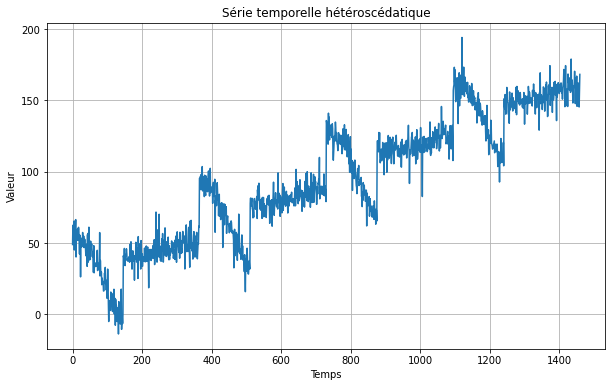

In [9]:
temps = np.linspace(0,len(serie_bb),len(serie_hetero))

plt.figure(figsize=(10, 6))
affiche_serie(temps,serie_hetero)
plt.title('Série temporelle hétéroscédatique')
plt.show()

Text(0.5, 1.0, 'Autocorrélation de la série hétéroscédique')

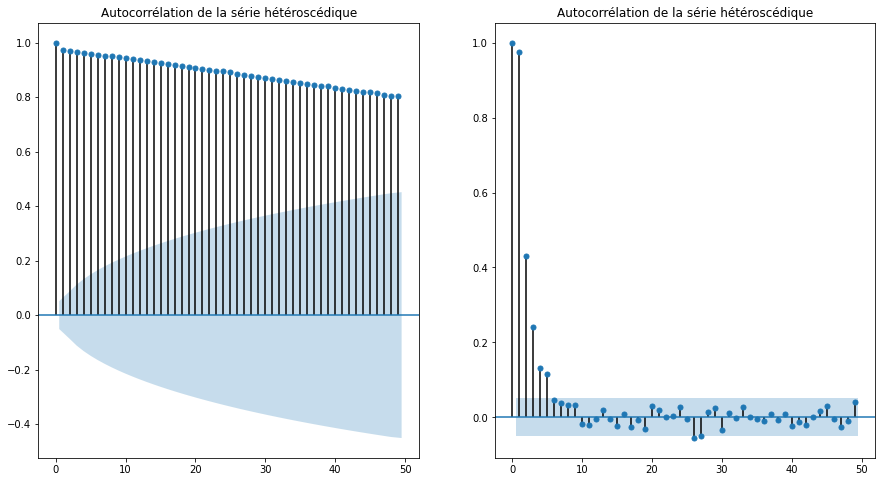

In [10]:
# ACF & PACF de la série Hétéroscédique

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_hetero, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation de la série hétéroscédique")

plot_pacf(serie_hetero, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation de la série hétéroscédique")

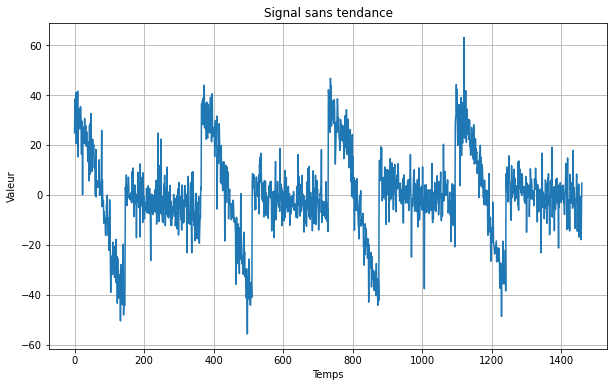

In [11]:
# Detendring de la série hétéroscédique
from scipy import signal

serie_hetero_detrend = signal.detrend(serie_hetero)

plt.figure(figsize=(10, 6))
affiche_serie(temps,serie_hetero_detrend)
plt.title('Signal sans tendance')
plt.show()

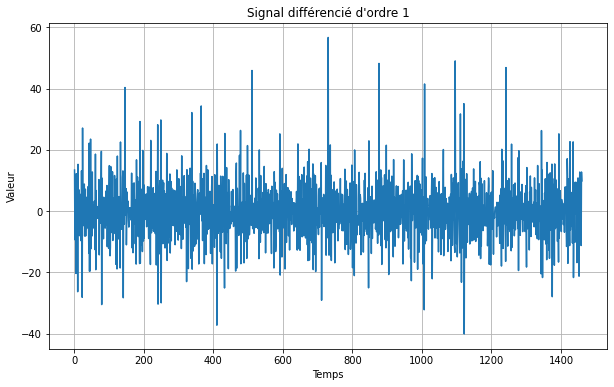

In [12]:
# Différenciation d'ordre 1

from statsmodels.tsa.statespace.tools import diff

serie_hetero_detrend_dif1 = diff(serie_hetero_detrend,1)

plt.figure(figsize=(10, 6))
affiche_serie(temps[1:],serie_hetero_detrend_dif1)
plt.title("Signal différencié d'ordre 1")
plt.show()

Text(0.5, 1.0, 'Autocorrélation du signal')

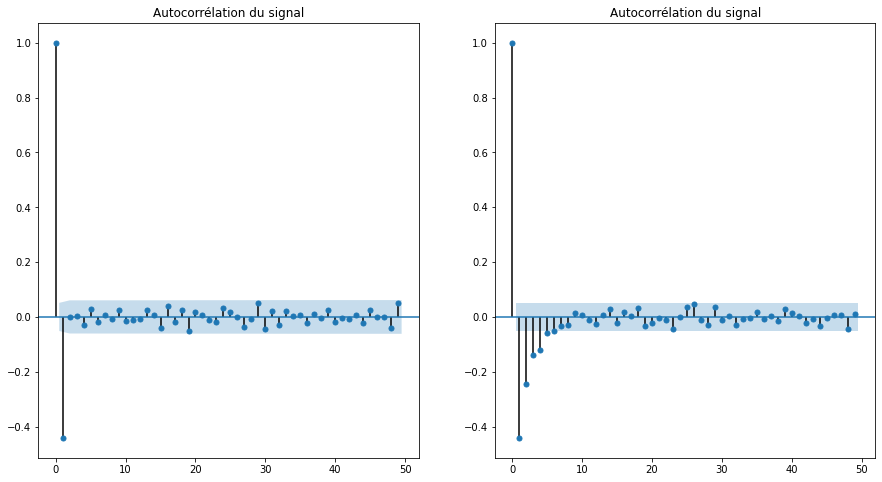

In [13]:
# ACF & PACF du signal

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_hetero_detrend_dif1, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation du signal")

plot_pacf(serie_hetero_detrend_dif1, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation du signal")

In [ ]:
# Différenciation d'odre 1 et saisonnale à l'odre 1 et de période 365

from statsmodels.tsa.statespace.tools import diff

serie_hetero_detrend_sdif1 = diff(serie_hetero,1,1,365)       # diff=1 ; diff_saison=1 ; periode = 365

lag = len(temps) - len(serie_hetero_detrend_sdif1)

plt.figure(figsize=(10, 6))
affiche_serie(temps[lag:],serie_hetero_detrend_sdif1)
plt.title("Signal différencié d'ordre 1 + saisonalité")
plt.show()

In [ ]:
# ACF & PACF du signal

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_hetero_detrend_dif1, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation du signal")

plot_pacf(serie_hetero_detrend_dif1, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation du signal")

In [ ]:
import statsmodels.api as sm

serie_test = serie_hetero
serie_test = serie_hetero_detrend
serie_test = serie_hetero_detrend_dif1
#serie_test = serie_hetero_detrend_sdif1


adf, p, usedlag, nobs, cvs, aic = sm.tsa.stattools.adfuller(serie_test)

adf_results_string = 'ADF: {}\np-value: {},\nN: {}, \ncritical values: {}'
print(adf_results_string.format(adf, p, nobs, cvs))

#6. PIB Américain 1947-2005

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(serie_gdp)
plt.title('Série GDP')
plt.show()

In [ ]:
# ACF & PACF de la série

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_gdp, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation de la série")

plot_pacf(serie_gdp, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation de la série")

In [ ]:
# Différenciation d'ordre 1

from statsmodels.tsa.statespace.tools import diff

serie_gdp_diff1 = diff(serie_gdp,1)

plt.figure(figsize=(10, 6))
plt.plot(serie_gdp_diff1)
plt.title("Signal différencié d'ordre 1")
plt.show()

In [ ]:
# ACF & PACF de la série

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_gdp_diff1, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation de la série")

plot_pacf(serie_gdp_diff1, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation de la série")

In [ ]:
# Différenciation d'ordre 2

from statsmodels.tsa.statespace.tools import diff

serie_gdp_diff2 = diff(serie_gdp,2)

plt.figure(figsize=(10, 6))
plt.plot(serie_gdp_diff2)
plt.title("Signal différencié d'ordre 2")
plt.show()

In [ ]:
# ACF & PACF de la série

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_gdp_diff2, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation de la série différenciée #2")

plot_pacf(serie_gdp_diff2, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation partielle de la série différencié #2")

In [ ]:
import statsmodels.api as sm

serie_test = serie_gdp
serie_test = serie_gdp_diff1
serie_test = serie_gdp_diff2


adf, p, usedlag, nobs, cvs, aic = sm.tsa.stattools.adfuller(serie_test)

adf_results_string = 'ADF: {}\np-value: {},\nN: {}, \ncritical values: {}'
print(adf_results_string.format(adf, p, nobs, cvs))

#7. Data Airline - Différenciation non saisonnale et saisonnale

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(serie_data_airline)
plt.title('Série Data Airline')
plt.show()

In [ ]:
# ACF & PACF de la série

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_data_airline, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation de la série")

plot_pacf(serie_data_airline, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation partielle de la série")

In [ ]:
# Différenciation d'odre 1 et saisonnale à l'odre 1 et de période 12

from statsmodels.tsa.statespace.tools import diff

serie_data_airline_sdiff1 = diff(serie_data_airline,1,1,12)       # diff=1 ; diff_saison=1 ; periode = 12


plt.figure(figsize=(10, 6))
plt.plot(serie_data_airline_sdiff1)
plt.title("Signal différencié d'ordre 1 + saisonalité")
plt.show()

In [ ]:
# ACF & PACF de la série

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_data_airline_sdiff1, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation de la série")

plot_pacf(serie_data_airline_sdiff1, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation partielle de la série")

In [ ]:
import statsmodels.api as sm

serie_test = serie_data_airline
serie_test = serie_data_airline_sdiff1


adf, p, usedlag, nobs, cvs, aic = sm.tsa.stattools.adfuller(serie_test)

adf_results_string = 'ADF: {}\np-value: {},\nN: {}, \ncritical values: {}'
print(adf_results_string.format(adf, p, nobs, cvs))

#8. Accidents - Extraction de la saisonnalité

**1. Affichage de la série : Morts par accidents 1973-1978 aux Etats Unis**

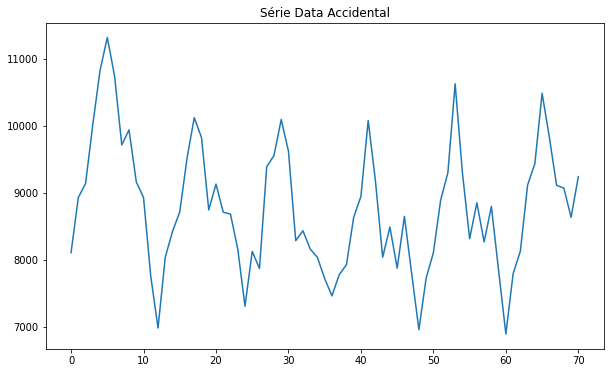

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(serie_data_accidental)
plt.title('Série Data Accidental')
plt.show()

**2. ACF et PACF**

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Text(0.5, 1.0, 'Autocorrélation partielle de la série')

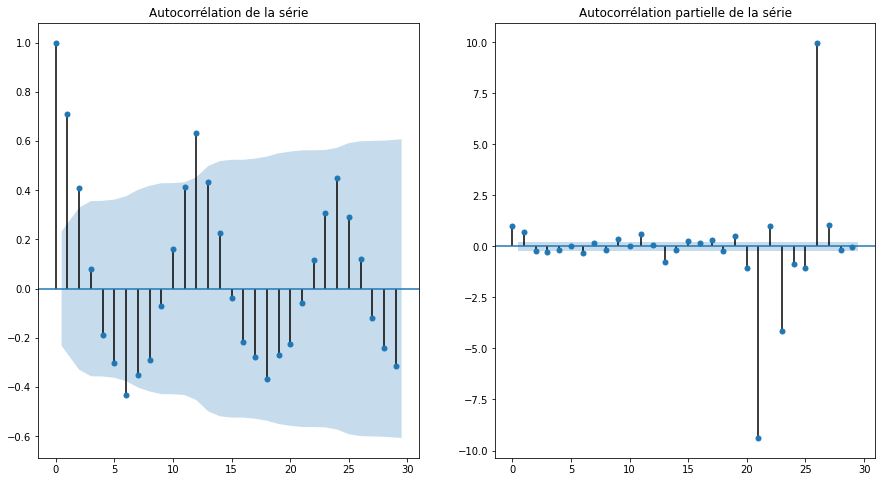

In [17]:
# ACF & PACF de la série

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_data_accidental, ax=ax1, lags = range(0,30))
ax1.set_title("Autocorrélation de la série")

plot_pacf(serie_data_accidental, ax=ax2, lags = range(0, 30))
ax2.set_title("Autocorrélation partielle de la série")

**3. Tendance quadratique**

L'objectif est ici de trouver le polynome : P = ax4+bx3+cx2+dx+c

Text(0.5, 1.0, 'Série avec tendance non linéaire supprimée')

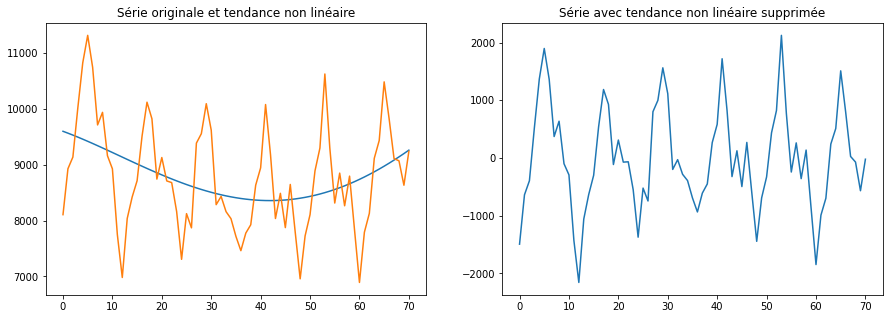

In [18]:
f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Calcul des coefficients
x = np.linspace(0,len(serie_data_accidental),len(serie_data_accidental))
coefs = np.polyfit(x,serie_data_accidental,4)

# Calcul de la tendance non linéaire
trend = coefs[0]*np.power(x,4) + coefs[1]*np.power(x,3) + coefs[2]*np.power(x,2) + coefs[3]*np.power(x,1) + coefs[4]

# Calcul de la série sans tendance
serie_data_accidental_detrend = serie_data_accidental - trend

# Affiche les résultats
ax1.plot(trend)
ax1.plot(serie_data_accidental)
ax1.set_title("Série originale et tendance non linéaire")

ax2.plot(serie_data_accidental_detrend)
ax2.set_title("Série avec tendance non linéaire supprimée")

**4. Analyse de la saisonnalité**

Text(0.5, 1.0, 'FFT')

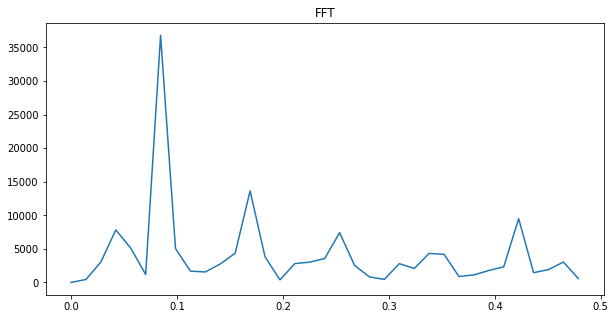

In [19]:
from scipy.fft import fft, fftfreq

f1, ax1 = plt.subplots(1, 1, figsize=(10, 5))

# Calcul de la FFT de la série
N = len(serie_data_accidental_detrend)
T = 1.0

fft=fft(serie_data_accidental_detrend)[:np.asarray(N/2).astype(int)]
freqs = fftfreq(N,T)[:np.asarray(N/2).astype(int)]

# Affichage
ax1.plot(freqs,abs(fft))
ax1.set_title("FFT")

Fréquences : [11.83333333  5.91666667]


Text(0.5, 1.0, 'FFT')

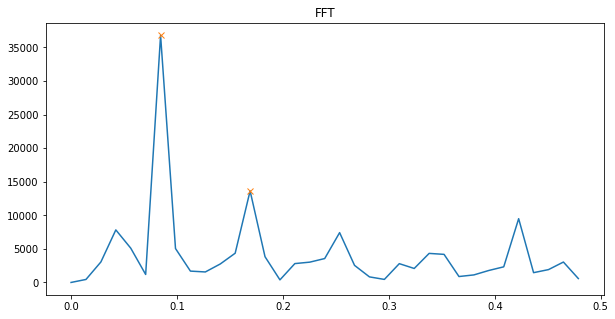

In [20]:
from scipy.signal import find_peaks

f1, ax1 = plt.subplots(1, 1, figsize=(10, 5))

peaks, _ = find_peaks(abs(fft), height=(10000))

print("Fréquences : %s" %(1.0/freqs[peaks]))

# Affichage
ax1.plot(freqs,abs(fft))
ax1.plot(freqs[peaks],abs(fft[peaks]),'x')
ax1.set_title("FFT")

Text(0.5, 1.0, 'Série sans tendance ni saisonnalité')

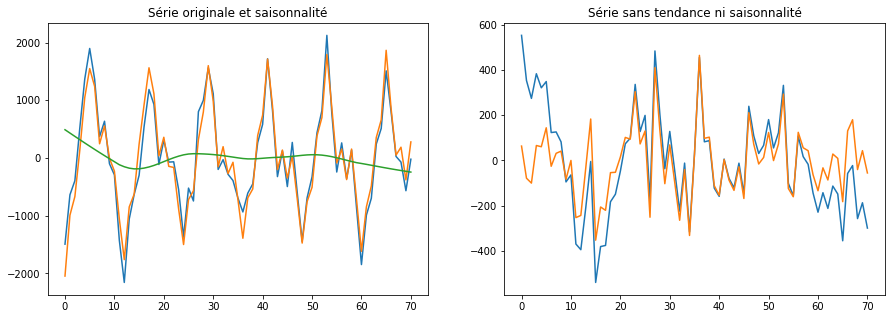

In [24]:
from statsmodels.tsa.seasonal import STL

stl = STL(serie_data_accidental_detrend, period=12)
res = stl.fit()

serie_data_accidental_saison = res.seasonal
serie_data_accidental_trend = res.trend
serie_data_accidental_resid = res.resid

# Affiche les résultats
f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(serie_data_accidental_detrend)
ax1.plot(serie_data_accidental_saison)
ax1.plot(serie_data_accidental_trend)

ax1.set_title("Série originale et saisonnalité")

ax2.plot(serie_data_accidental_detrend - serie_data_accidental_saison)
ax2.plot(serie_data_accidental_resid)

ax2.set_title("Série sans tendance ni saisonnalité")

In [26]:
import statsmodels.api as sm

serie_test = serie_data_accidental
serie_test = serie_data_accidental_detrend
serie_test = serie_data_accidental_detrend - serie_data_accidental_saison
serie_test = serie_data_accidental_resid

adf, p, usedlag, nobs, cvs, aic = sm.tsa.stattools.adfuller(serie_test)

adf_results_string = 'ADF: {}\np-value: {},\nN: {}, \ncritical values: {}'
print(adf_results_string.format(adf, p, nobs, cvs))

ADF: -7.331851224870528
p-value: 1.1224753097925005e-10,
N: 70, 
critical values: {'1%': -3.5274258688046647, '5%': -2.903810816326531, '10%': -2.5893204081632653}


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Text(0.5, 1.0, 'Autocorrélation partielle de la série')

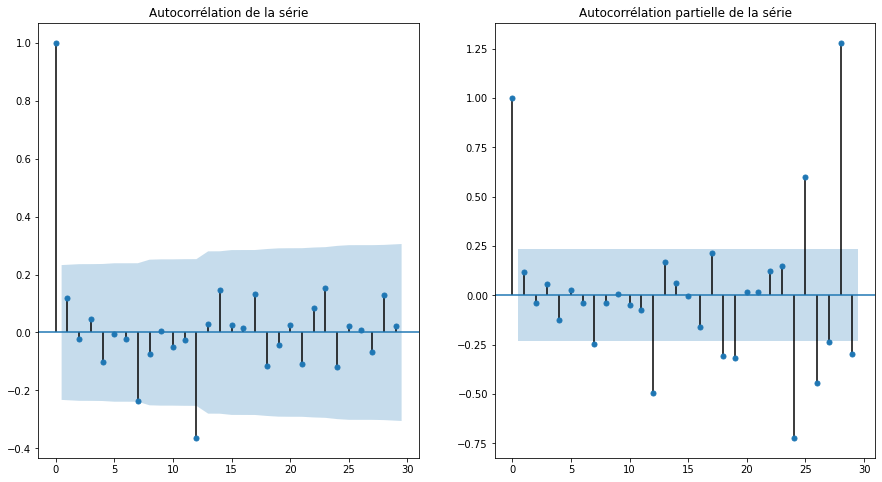

In [28]:
# ACF & PACF de la série

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie_data_accidental_resid, ax=ax1, lags = range(0,30))
ax1.set_title("Autocorrélation de la série")

plot_pacf(serie_data_accidental_resid, ax=ax2, lags = range(0, 30))
ax2.set_title("Autocorrélation partielle de la série")